In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from itertools import combinations
from tqdm import tqdm

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)
import soporte_clustering as sc
import pickle
%load_ext autoreload
%autoreload 2

# Visualización de gráficos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import KNNImputer

# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
# import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_encoded=pd.read_csv("../results/data_encoded_minmax.csv",index_col=0)
data_encoded.head(3)

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_minmax,Quantity_minmax,Discount_minmax,Profit_minmax,Shipping Cost_minmax
0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,1,0.899774,0.615385,0.125,0.595121,1.000000
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0.911889,0.384615,0.000,0.611442,0.959464
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0.883913,0.307692,0.250,0.805561,0.947788


In [3]:
df_original=pd.read_csv("../results/data_post_EDA.csv",index_col=0)
df_original.head(3)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.485,867.69,Low


# Clustering

In [4]:
cluster=sc.Clustering(data_encoded)

100%|██████████| 2/2 [00:00<00:00,  6.39it/s]


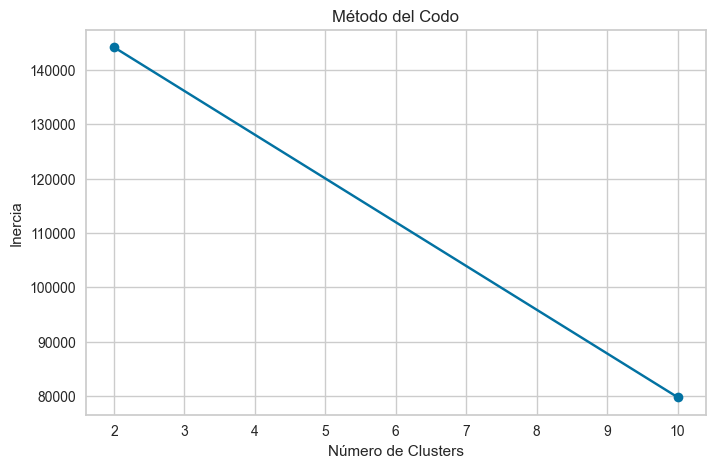

[144165.81714926774, 79756.95082067297]

In [5]:
cluster.elbow_method(cluster_range=(2, 10))

100%|██████████| 8/8 [05:27<00:00, 40.97s/it]


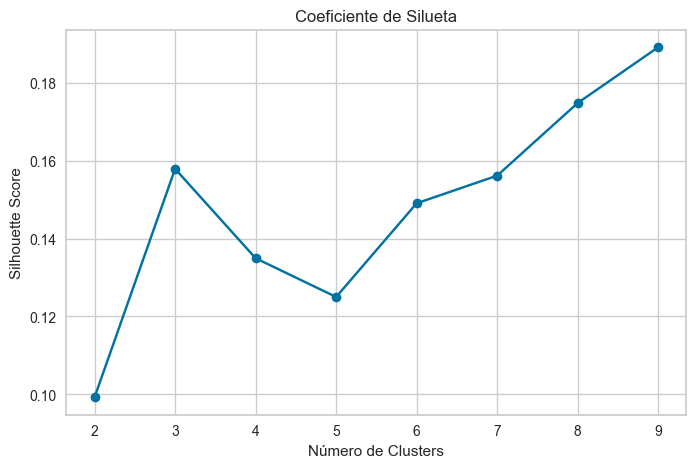

[np.float64(0.09928577738998393),
 np.float64(0.157864367567855),
 np.float64(0.1349413922767879),
 np.float64(0.12500132690778584),
 np.float64(0.14903470285216175),
 np.float64(0.15612324814297027),
 np.float64(0.17476380246875164),
 np.float64(0.18906731641699986)]

In [6]:
cluster.silhouette_method(cluster_range=range(2, 10))

100%|██████████| 8/8 [00:00<00:00, 12.81it/s]


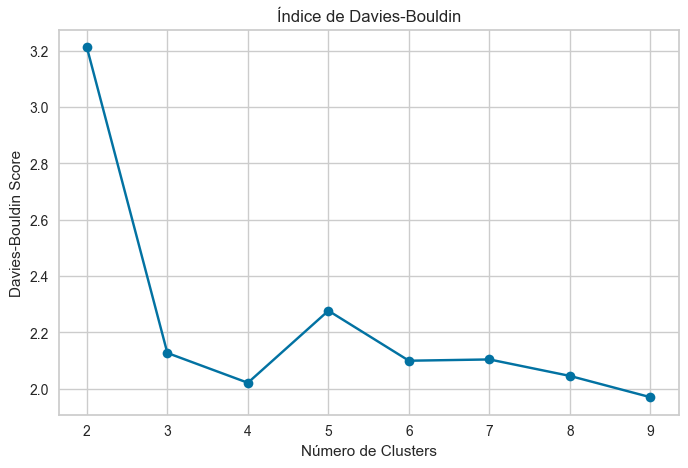

[np.float64(3.212159707452109),
 np.float64(2.1272756945241813),
 np.float64(2.0214426393067484),
 np.float64(2.277240341515145),
 np.float64(2.099756552204472),
 np.float64(2.1042975381850124),
 np.float64(2.0457956449752923),
 np.float64(1.9702423009727172)]

In [7]:
cluster.davies_bouldin_method(cluster_range=range(2, 10))

In [8]:
df_clusters_kmeans2,labels=cluster.modelo_kmeans(df_original,2)
data_encoded_kmeans2=data_encoded.copy()
data_encoded_kmeans2["clusters_kmeans"]=labels
data_encoded_kmeans2.head(5)

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_minmax,Quantity_minmax,Discount_minmax,Profit_minmax,Shipping Cost_minmax,clusters_kmeans
0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,1,0.899774,0.615385,0.125,0.595121,1.000000,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0.911889,0.384615,0.000,0.611442,0.959464,0
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0.883913,0.307692,0.250,0.805561,0.947788,1
3,0,1,0,1,0,0,0,0,0,0,1,0,0,2,2,0.804304,0.307692,0.000,0.537009,0.912702,0
4,0,0,1,0,0,0,0,0,1,0,1,0,0,2,3,0.386207,0.461538,0.000,0.531563,0.885045,0


In [9]:
df_clusters_kmeans2.head(5)


,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,0
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High,0
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.485,867.69,Low,1
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.550,835.57,High,0
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.020,810.25,Critical,0


In [10]:
sc.calcular_metricas(data_encoded_kmeans2, "clusters_kmeans")

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.102468,3.147084,"{0: 13579, 1: 35912}"


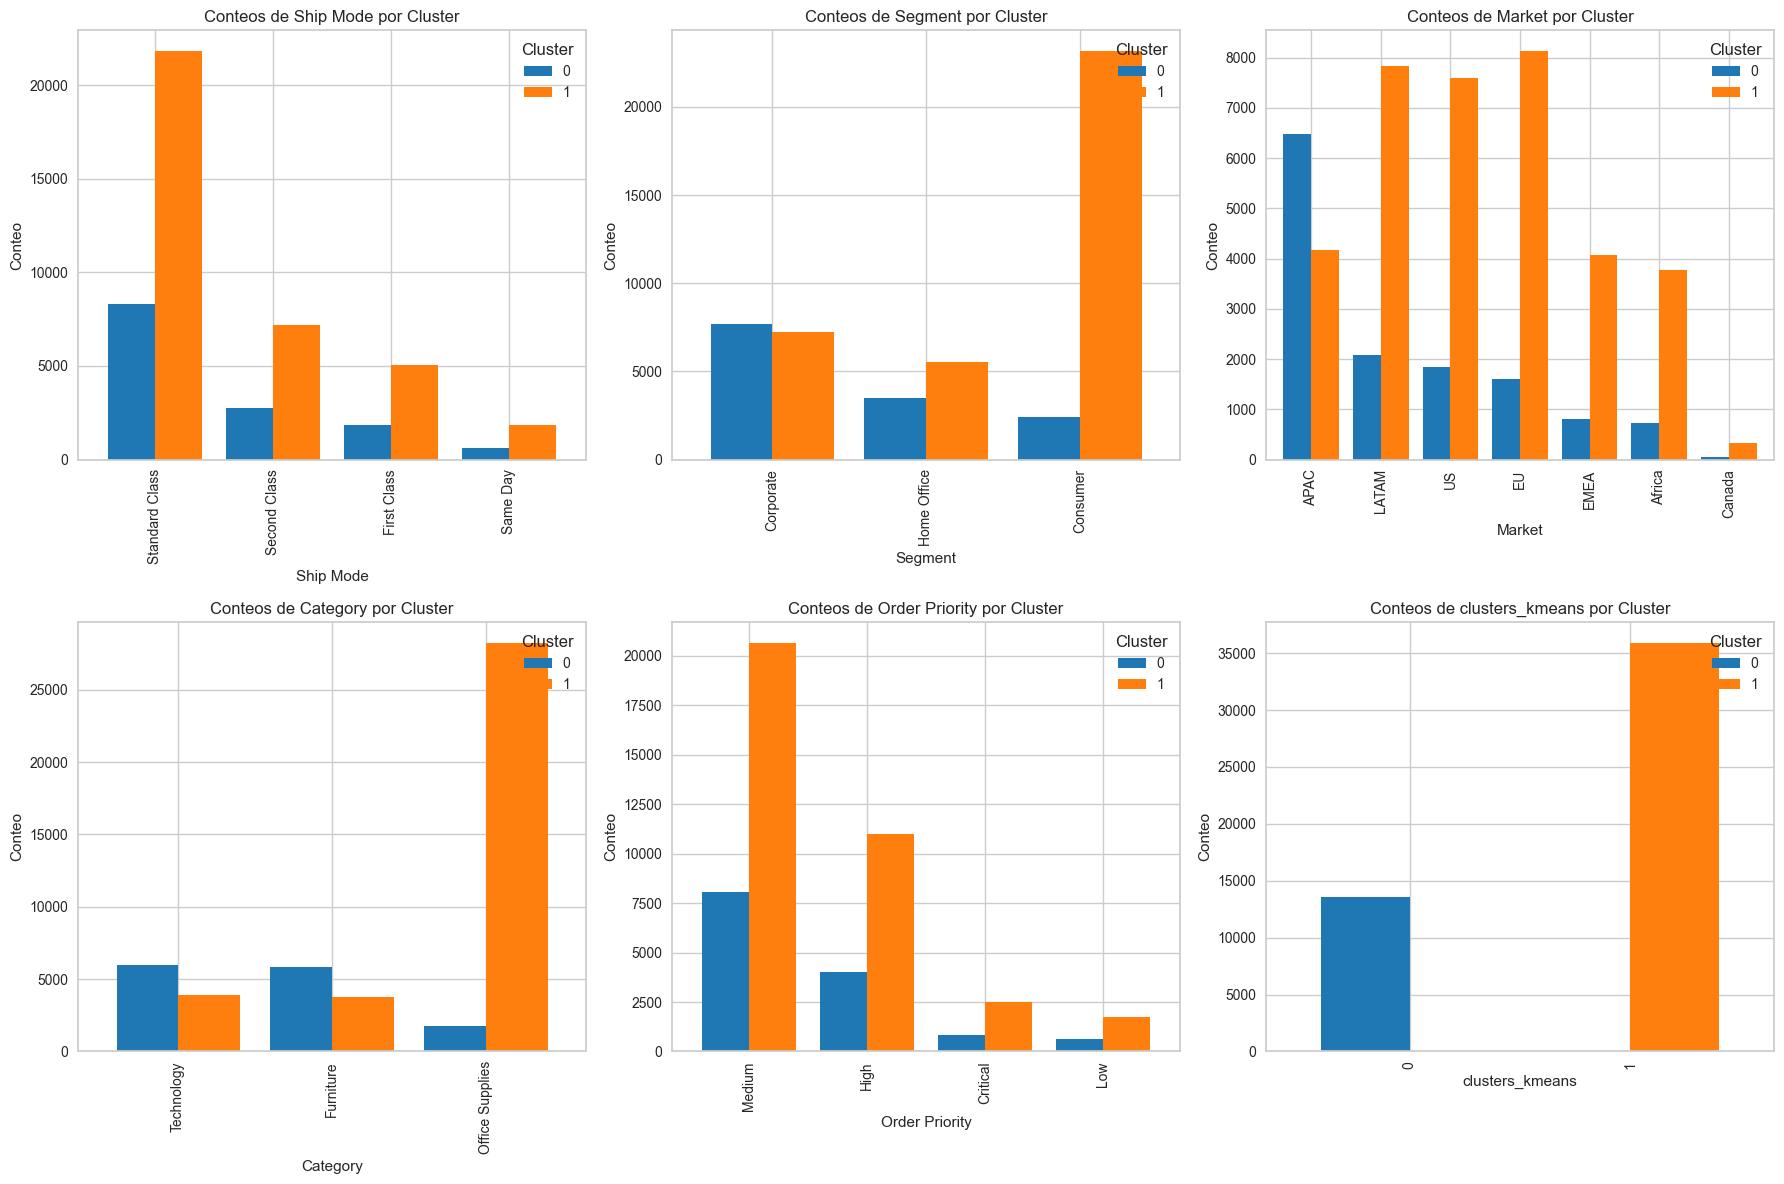

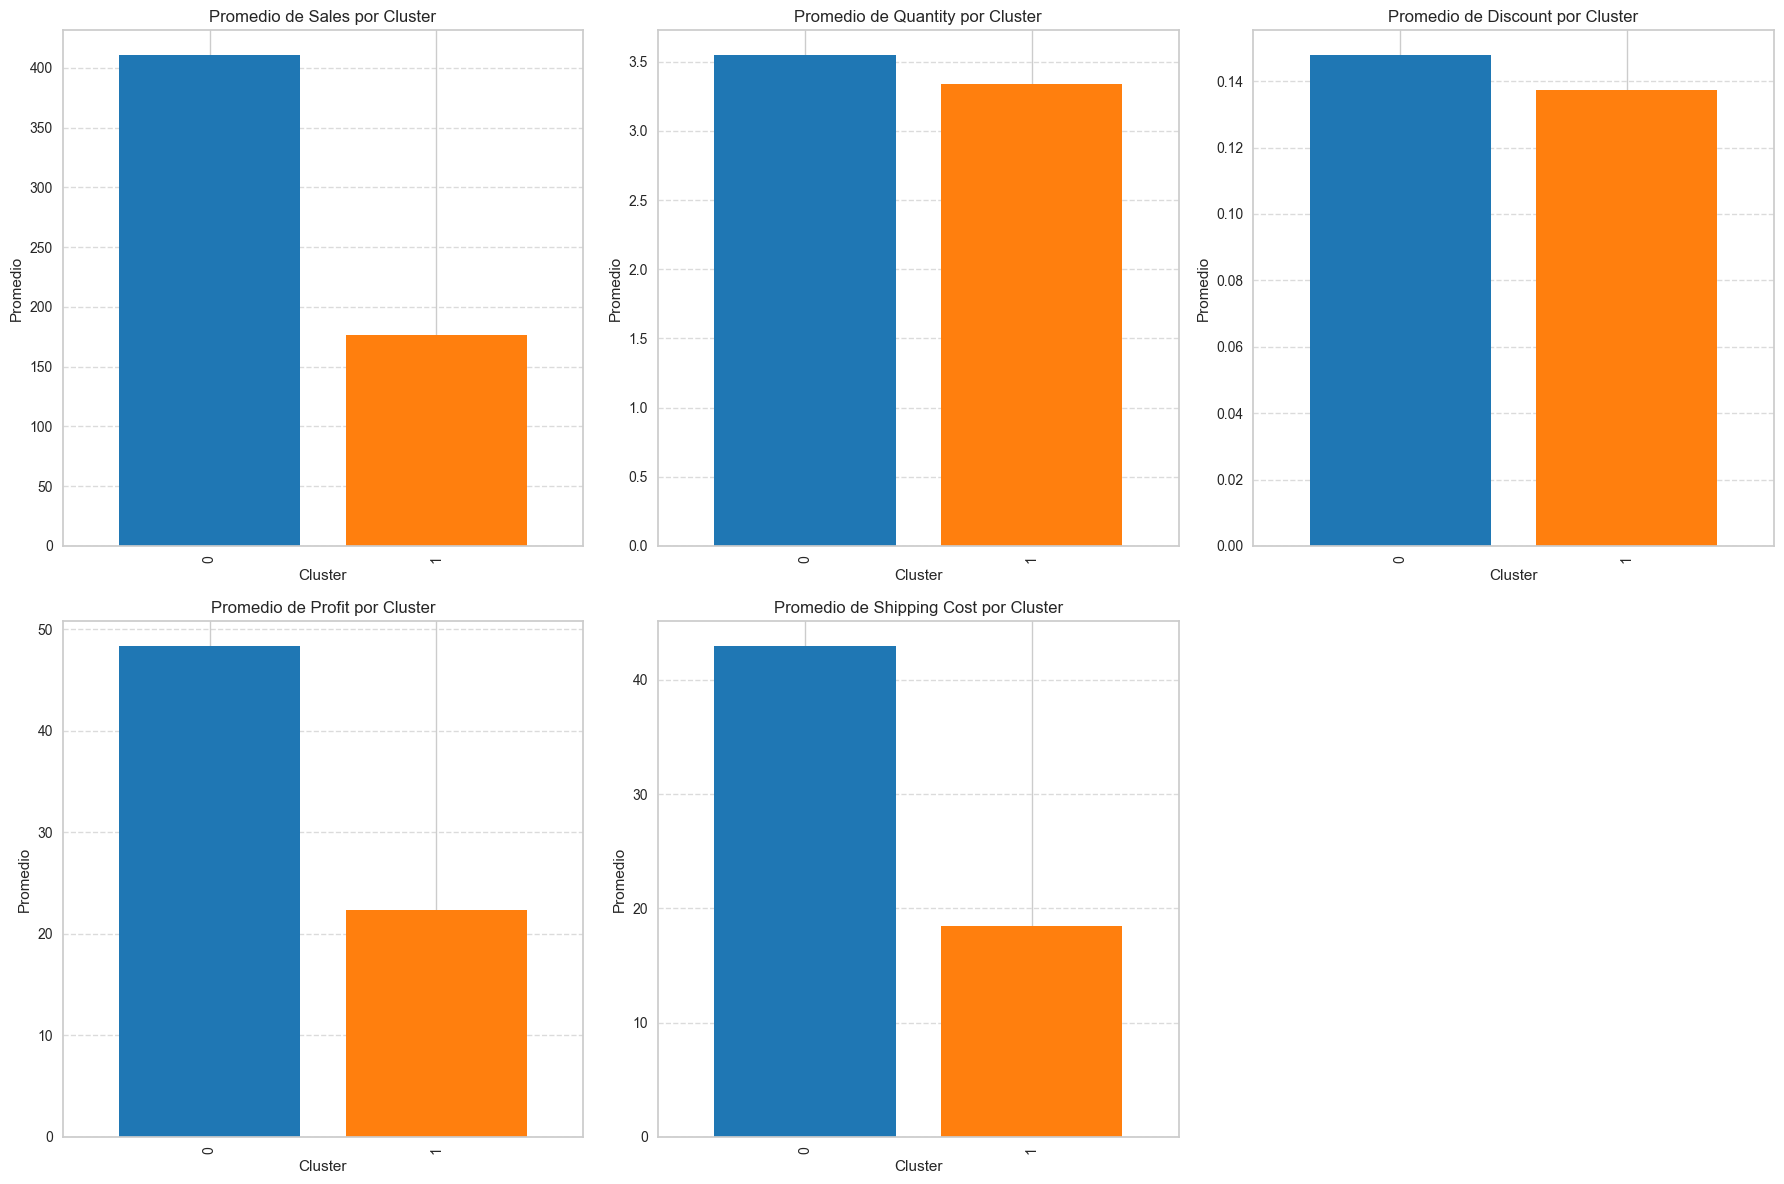

In [11]:
sc.graficar_clusters(df_clusters_kmeans2, cluster_col='clusters_kmeans', figsize=(18, 6), palette="tab10")

In [12]:
df_clusters_kmeans3,labels=cluster.modelo_kmeans(df_original,3)
data_encoded_kmeans3=data_encoded.copy()
data_encoded_kmeans3["clusters_kmeans"]=labels
data_encoded_kmeans3.head(5)

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_minmax,Quantity_minmax,Discount_minmax,Profit_minmax,Shipping Cost_minmax,clusters_kmeans
0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,1,0.899774,0.615385,0.125,0.595121,1.000000,2
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0.911889,0.384615,0.000,0.611442,0.959464,1
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0.883913,0.307692,0.250,0.805561,0.947788,0
3,0,1,0,1,0,0,0,0,0,0,1,0,0,2,2,0.804304,0.307692,0.000,0.537009,0.912702,2
4,0,0,1,0,0,0,0,0,1,0,1,0,0,2,3,0.386207,0.461538,0.000,0.531563,0.885045,2


In [13]:
df_clusters_kmeans3.head(5)


,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,2
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High,1
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.485,867.69,Low,0
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.550,835.57,High,2
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.020,810.25,Critical,2


In [14]:
sc.calcular_metricas(data_encoded_kmeans3, "clusters_kmeans")

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.155997,2.09146,"{0: 16981, 1: 17896, 2: 14614}"


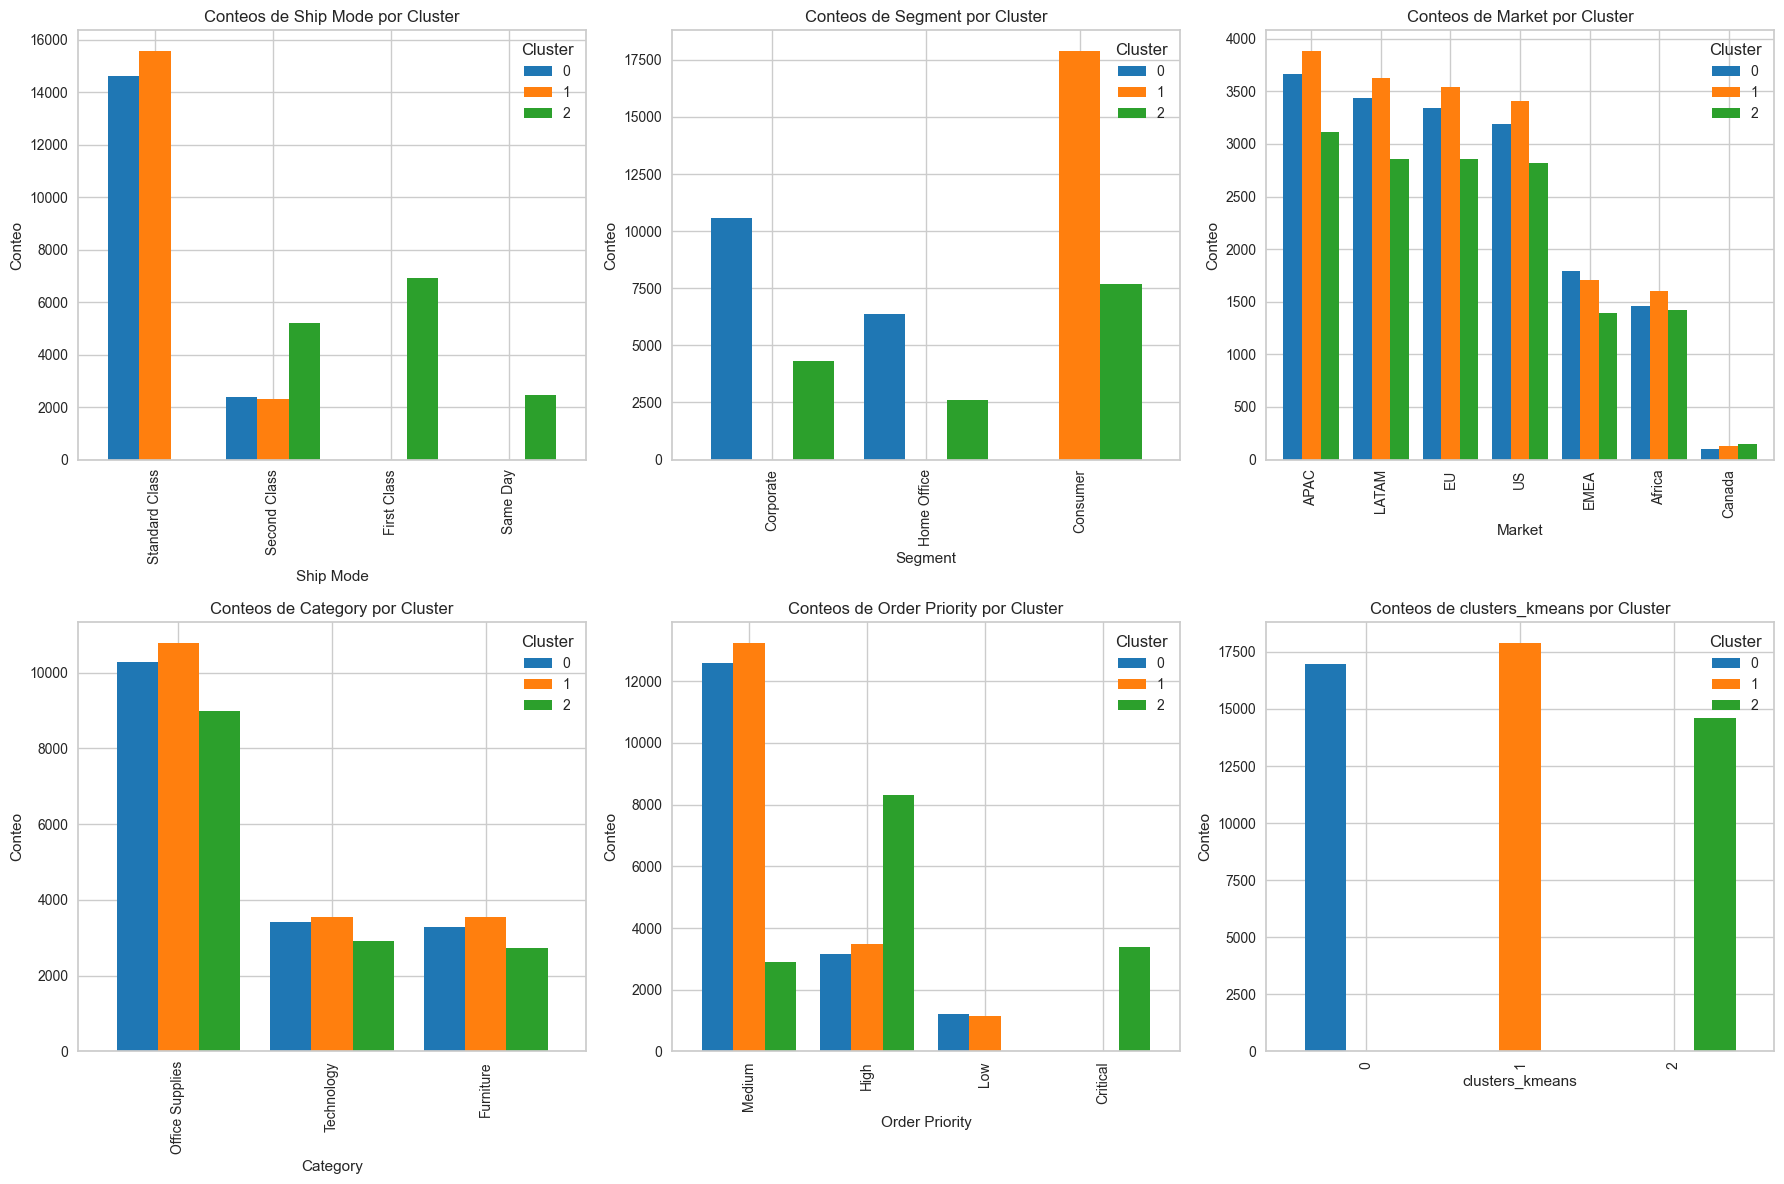

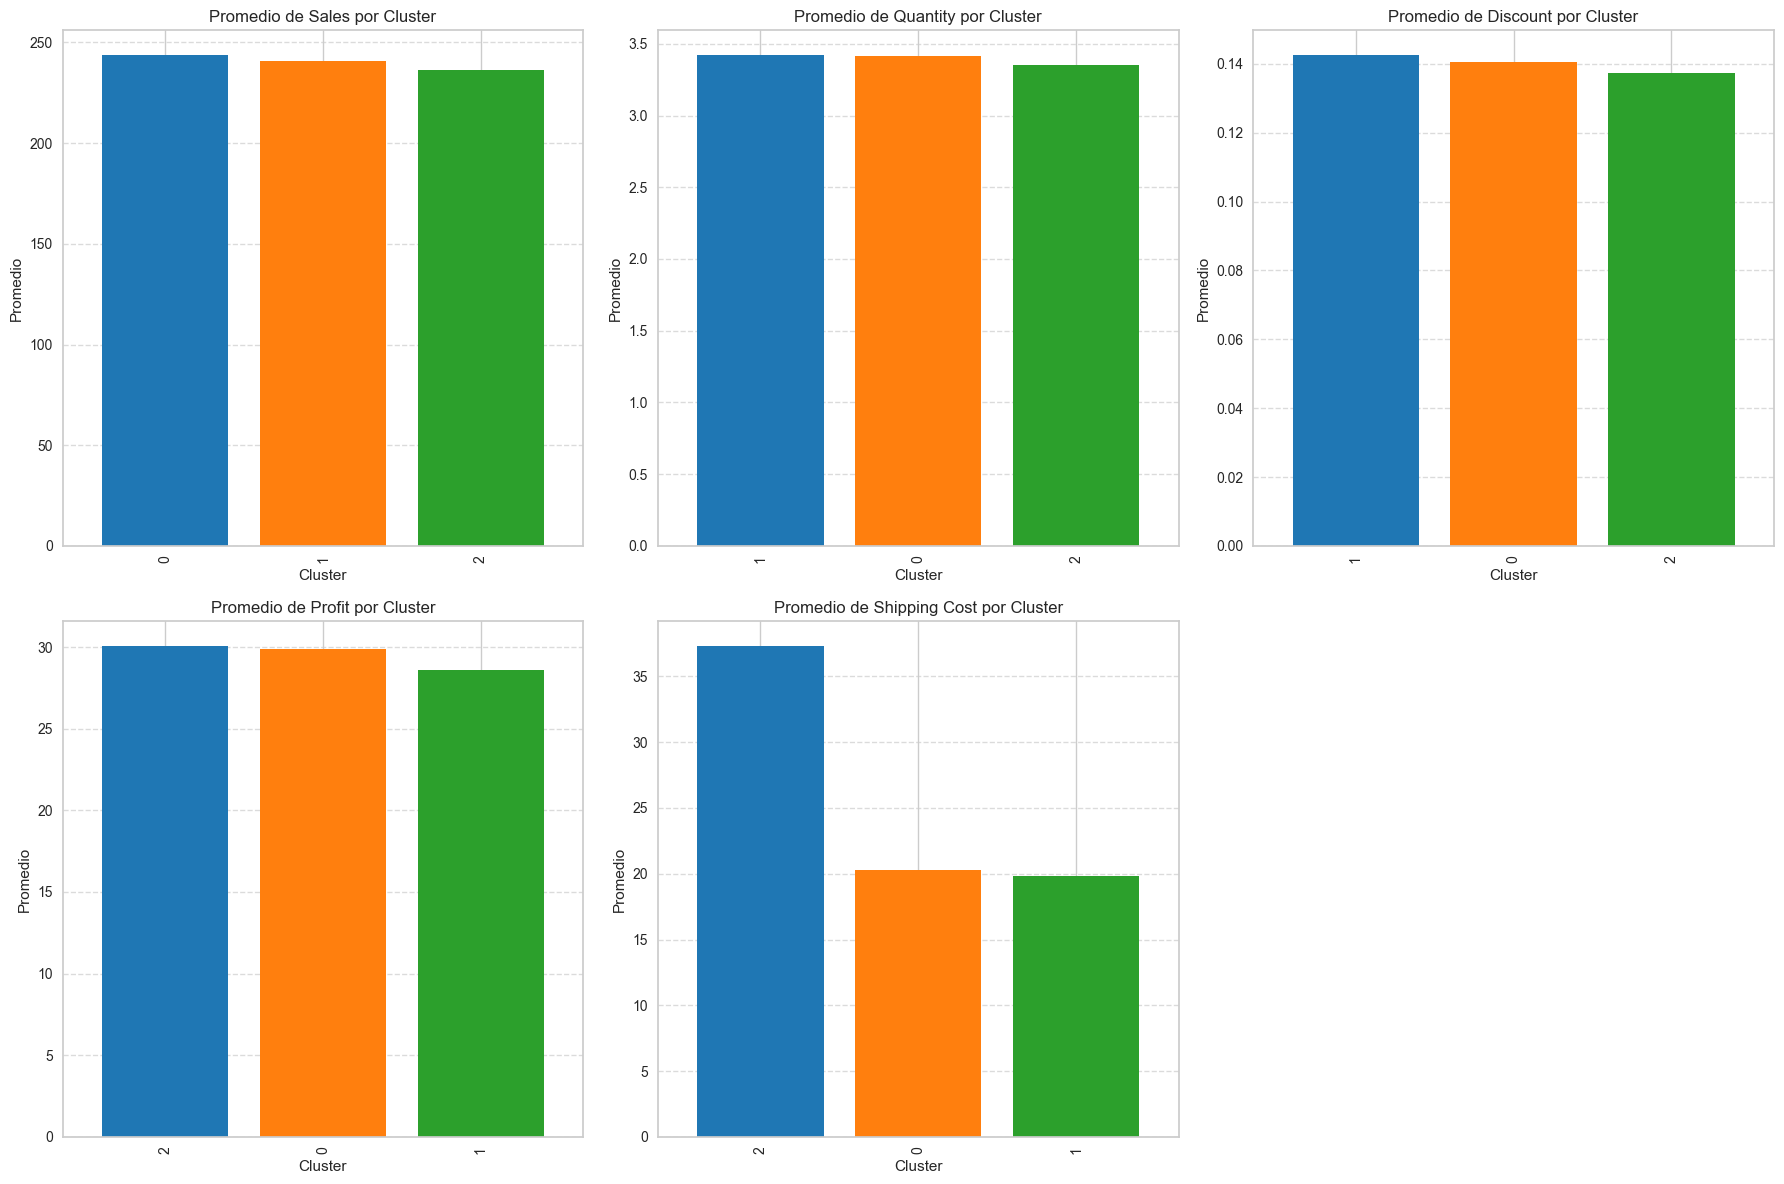

In [15]:
sc.graficar_clusters(df_clusters_kmeans3, cluster_col='clusters_kmeans', figsize=(18, 6), palette="tab10")


In [16]:
# resultados = {}

# # Monitorear el progreso con tqdm
# for n_clusters in tqdm(range(2, 11), desc="Probando diferentes números de clusters"):
#     modelo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
#     labels = modelo.fit_predict(data_encoded)
#     silhouette = silhouette_score(data_encoded, labels)
#     resultados[n_clusters] = silhouette

# # Mostrar resultados
# print("\nResultados:")
# for n_clusters, score in resultados.items():
#     print(f"Clusters: {n_clusters}, Silhouette Score: {score}")


In [17]:
# df_clusters_aglomerativo=cluster.modelo_aglomerativo(2, "ward", df_original)

In [18]:
# df_clusters_espectral2,labels_espectral2=cluster.modelo_espectral(df_original, n_clusters=2, assign_labels='kmeans')
# df_clusters_espectral2.head(3)

In [19]:
# data_encoded_espectral2=data_encoded.copy()
# data_encoded_espectral2["clusters_spectral"]=labels_espectral2
# data_encoded_espectral2.head(5)

In [20]:
# sc.calcular_metricas(df_clusters_espectral2, "clusters_spectral")

In [21]:
# sc.graficar_clusters(data_encoded_espectral2, cluster_col='clusters_spectral', figsize=(18, 6), palette="tab10")

In [22]:
df_clusters_dbscan,resultados,labels_dbscan=cluster.modelo_dbscan(df_original, eps_values=[1.0, 1.5, 2.0], min_samples_values=[100, 50])
df_clusters_dbscan.head(3)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans,clusters_dbscan
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,2,-1
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High,1,-1
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.485,867.69,Low,0,-1


In [23]:
resultados

{'best_eps': 1.0,
 'best_min_samples': 100,
 'best_silhouette': np.float64(0.45089807629347395),
 'unique_clusters': 64}

In [24]:
data_encoded_dbscan=data_encoded.copy()
data_encoded_dbscan["clusters_dbscan"]=labels_dbscan
data_encoded_dbscan.head(5)

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_minmax,Quantity_minmax,Discount_minmax,Profit_minmax,Shipping Cost_minmax,clusters_dbscan
0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,1,0.899774,0.615385,0.125,0.595121,1.000000,-1
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0.911889,0.384615,0.000,0.611442,0.959464,-1
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0.883913,0.307692,0.250,0.805561,0.947788,-1
3,0,1,0,1,0,0,0,0,0,0,1,0,0,2,2,0.804304,0.307692,0.000,0.537009,0.912702,-1
4,0,0,1,0,0,0,0,0,1,0,1,0,0,2,3,0.386207,0.461538,0.000,0.531563,0.885045,-1


In [25]:
sc.calcular_metricas(data_encoded_dbscan, "clusters_dbscan")

,silhouette_score,davies_bouldin_index,cardinalidad
0,-0.016639,1.191242,"{-1: 30437, 0: 265, 1: 258, 2: 299, 3: 274, 4:..."


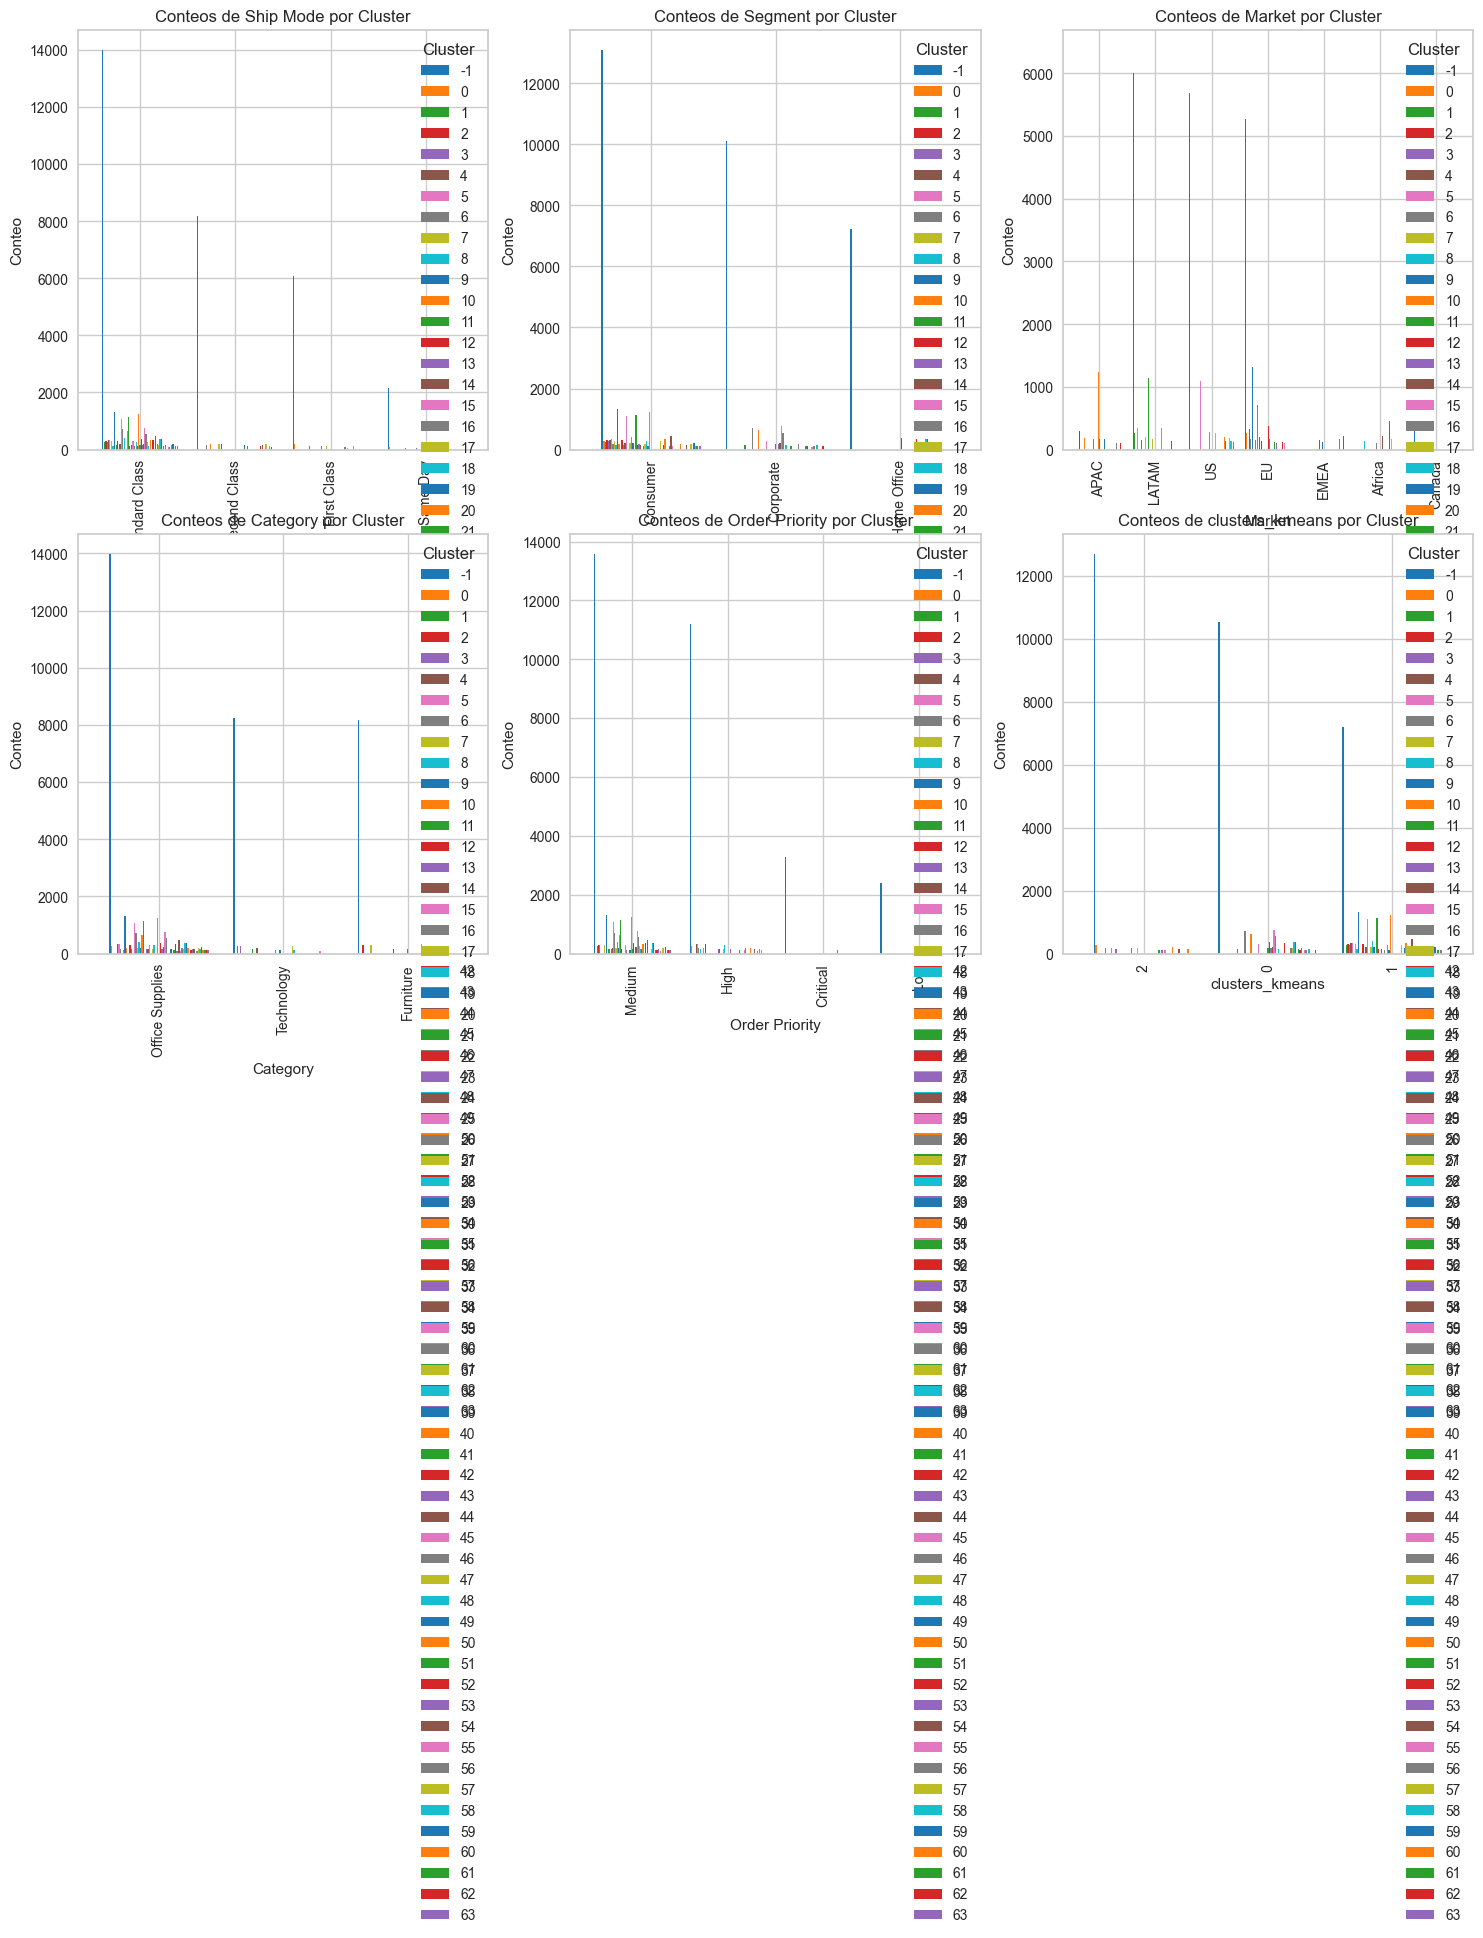

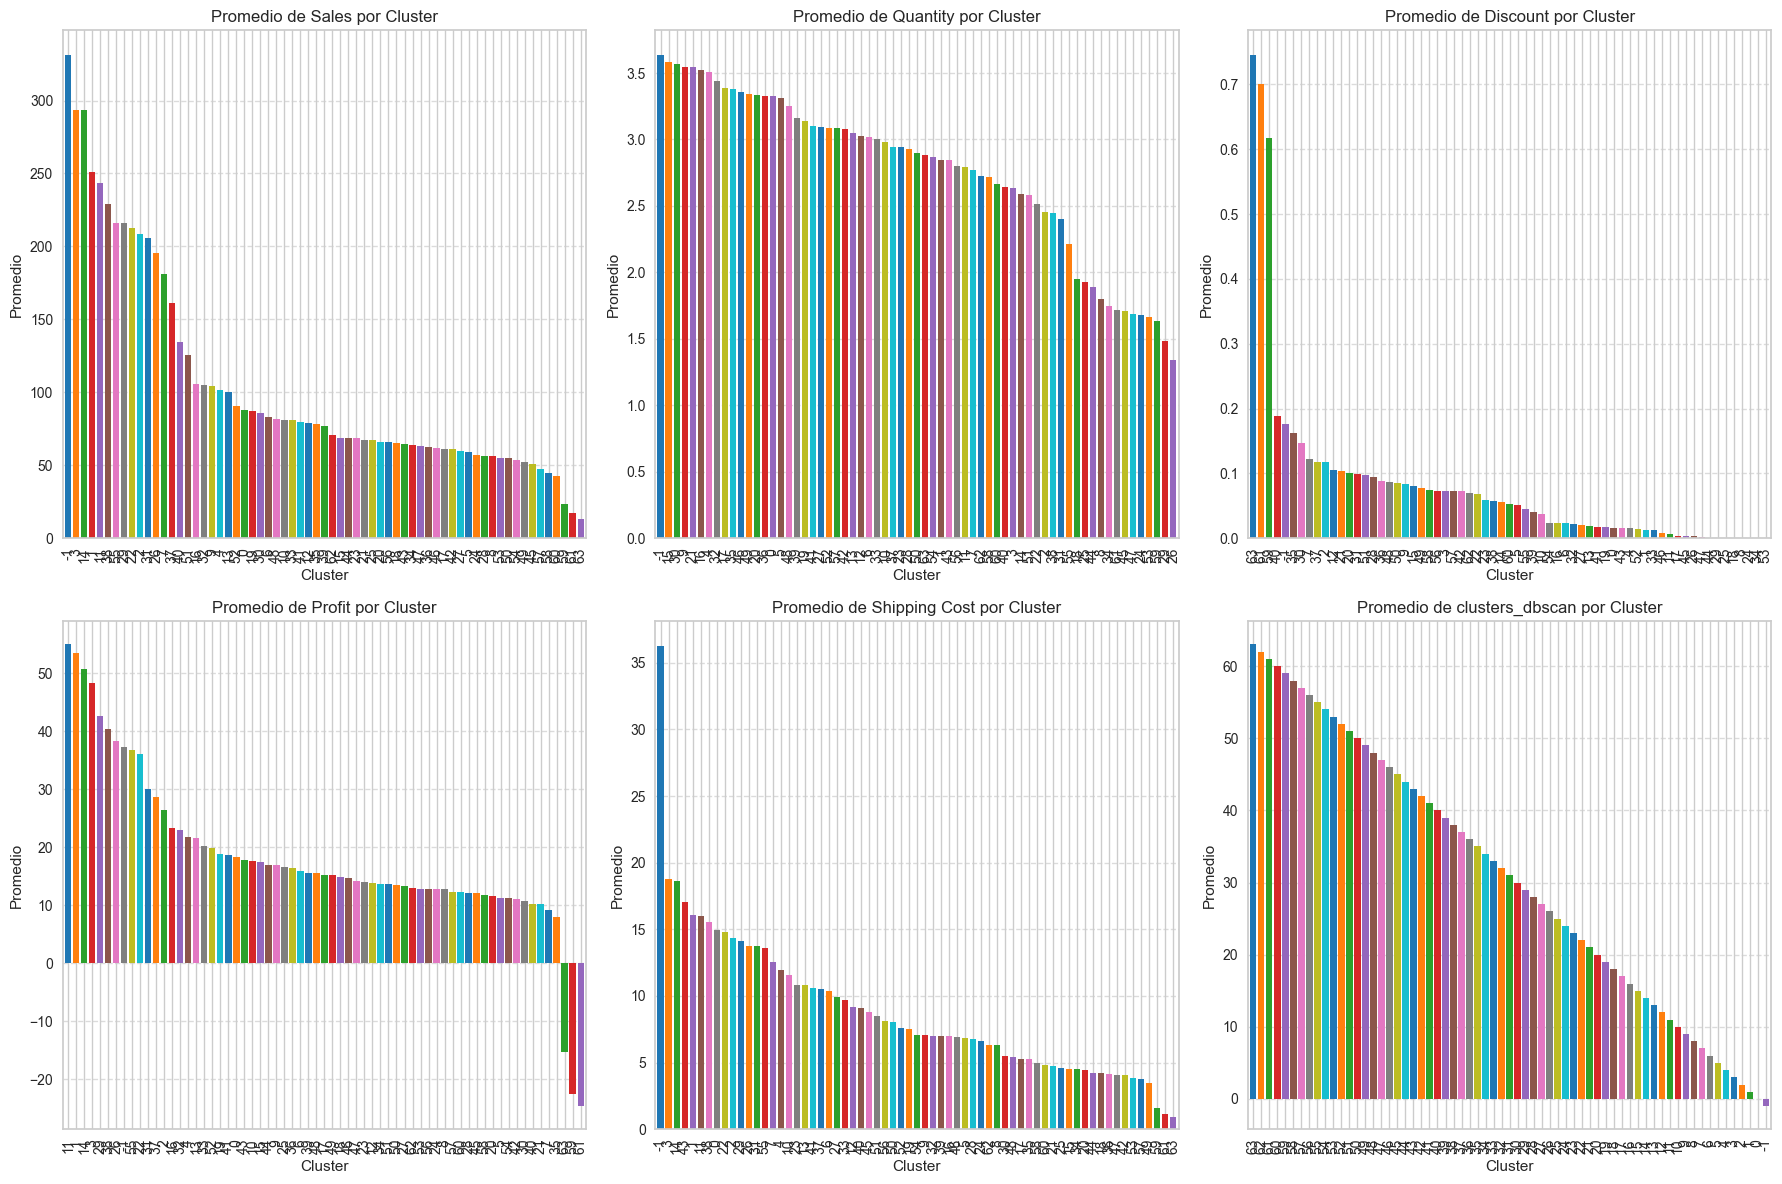

In [26]:
sc.graficar_clusters(df_clusters_dbscan, cluster_col='clusters_dbscan', figsize=(18, 6), palette="tab10")
